In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
import plotly.express as px
from statsmodels.graphics.factorplots import interaction_plot

In [2]:
df = pd.read_csv('student.csv')

In [3]:
df.head(10)

,sex,internet,studytime,familysize,age,score
0,F,no,2. 2 - 5 hours,>3,18,6
1,F,yes,2. 2 - 5 hours,>3,17,6
2,F,yes,2. 2 - 5 hours,<=3,15,10
3,F,yes,3. 5 - 10 hours,>3,15,15
4,F,no,2. 2 - 5 hours,>3,16,10
5,M,yes,2. 2 - 5 hours,<=3,16,15
6,M,yes,2. 2 - 5 hours,<=3,16,11
7,F,no,2. 2 - 5 hours,>3,17,6
8,M,yes,2. 2 - 5 hours,<=3,15,19
9,M,yes,2. 2 - 5 hours,>3,15,15


In [4]:
df.tail(10)

,sex,internet,studytime,familysize,age,score
385,F,no,3. 5 - 10 hours,>3,18,10
386,F,yes,1. <2 hours,>3,18,6
387,F,yes,3. 5 - 10 hours,>3,19,0
388,F,yes,2. 2 - 5 hours,<=3,18,8
389,F,no,2. 2 - 5 hours,>3,18,0
390,M,no,2. 2 - 5 hours,<=3,20,9
391,M,yes,1. <2 hours,<=3,17,16
392,M,no,1. <2 hours,>3,21,7
393,M,yes,1. <2 hours,<=3,18,10
394,M,yes,1. <2 hours,<=3,19,9


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sex         395 non-null    object
 1   internet    395 non-null    object
 2   studytime   395 non-null    object
 3   familysize  395 non-null    object
 4   age         395 non-null    int64 
 5   score       395 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 18.6+ KB


In [6]:
df.describe()

,age,score
count,395.000000,395.000000
mean,16.696203,10.415190
std,1.276043,4.581443
min,15.000000,0.000000
25%,16.000000,8.000000
50%,17.000000,11.000000
75%,18.000000,14.000000
max,22.000000,20.000000


# Sample size

In [7]:
pa = len(df)

print('The sample size is:', pa)

The sample size is: 395


# CUANTOS HOMBRES Y MUJERES

In [8]:
table = pd.pivot_table(df, index = 'sex', values = 'score', columns = None, aggfunc = 'count').reset_index
table

<bound method DataFrame.reset_index of      score
sex       
F      208
M      187>

Text(0.5, 0, 'Sex')

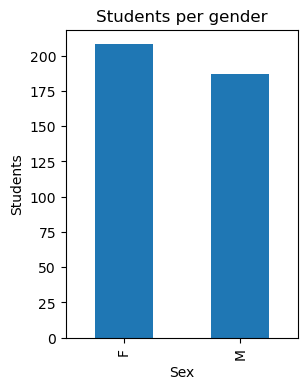

In [78]:
df['sex'].value_counts().plot(kind = 'bar', figsize = (3,4),)
plt.title('Students per gender')
plt.ylabel('Students')
plt.xlabel('Sex')

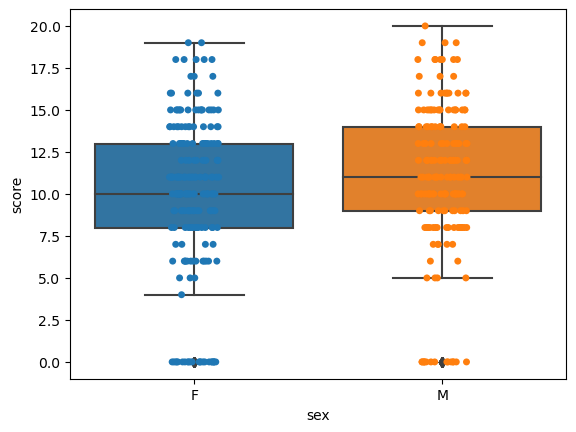

In [14]:
ax_s = sns.boxplot(x='sex', y='score', data=df)
ax_s = sns.stripplot(x= 'sex', y= 'score', data=df)

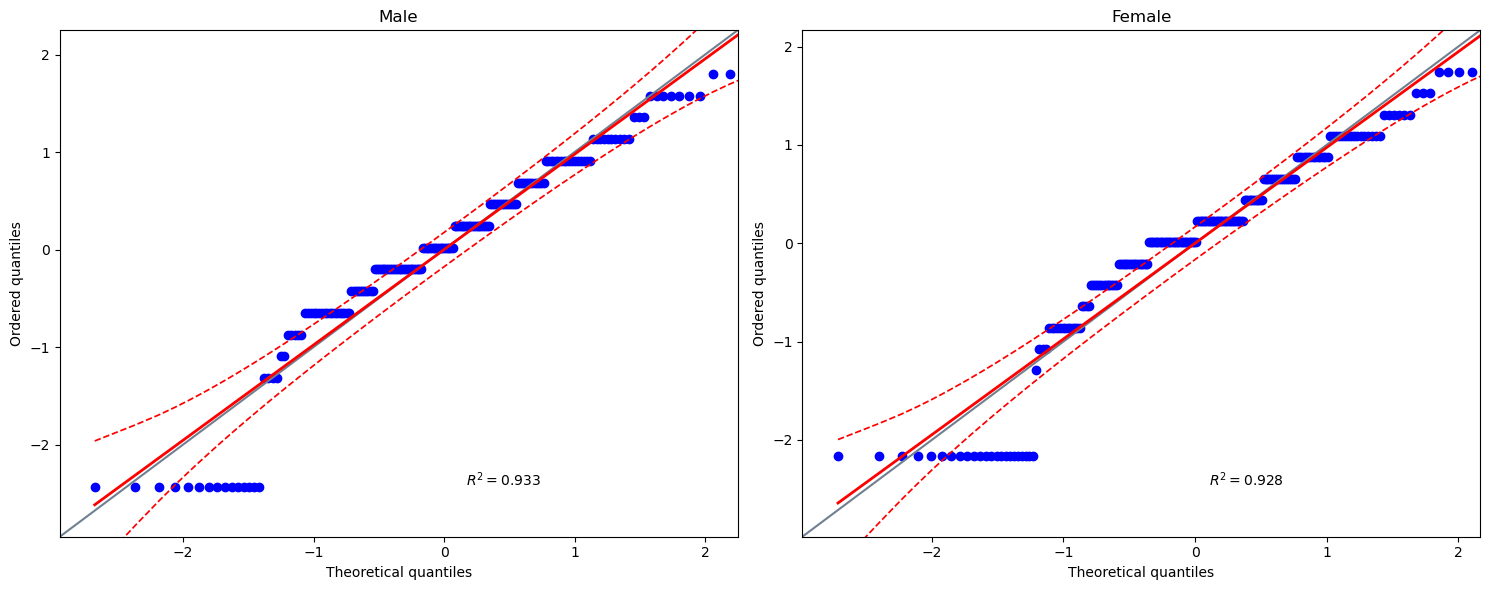

In [15]:
fig, axs = plt.subplots(1,2, figsize=(15,6))
pg.qqplot(df.loc[df.sex == 'M', 'score'], dist='norm', ax=axs[0])
axs[0].set_title('Male')
pg.qqplot(df.loc[df.sex == 'F', 'score'], dist='norm', ax=axs[1])
axs[1].set_title('Female')
plt.tight_layout()

# CUANTAS PEROSNAS HAY DE CADA EDAD

In [16]:
pce = df['age'].value_counts()
pce

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

Text(0.5, 0, 'Age')

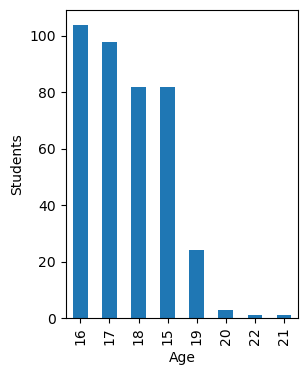

In [79]:
df['age'].value_counts().plot(kind = 'bar', figsize = (3,4),)
plt.ylabel('Students')
plt.xlabel('Age')

Distribution percentage per age


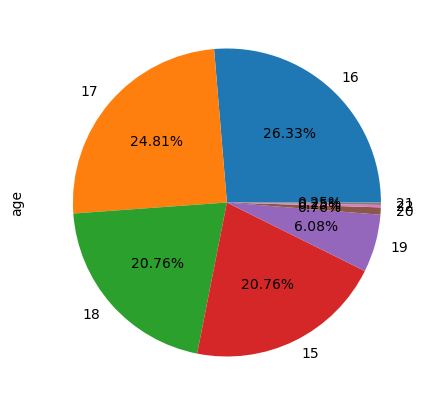

In [84]:
print('Distribution percentage per age')
pce = df['age'].value_counts().plot(kind = 'pie', figsize = (5,5), autopct = '%.2f%%' )

In [20]:
seage = df.pivot_table(
    values="score", index="age", columns="sex", aggfunc= 'count'
)
seage

sex,F,M
age,,
15,38.0,44.0
16,54.0,50.0
17,58.0,40.0
18,43.0,39.0
19,14.0,10.0
20,1.0,2.0
21,NaN,1.0
22,NaN,1.0


Text(0.5, 1.0, 'Students per gender and per age')

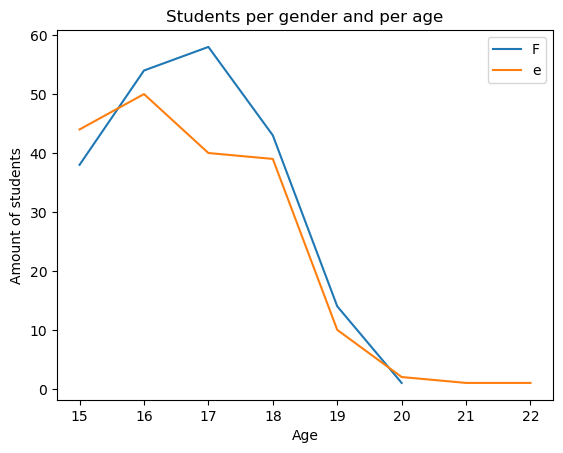

In [25]:
ax = plt.subplots ()
ax = plt.plot(seage)
plt.ylabel('Amount of students')
plt.xlabel('Age')
plt.legend('Female')


plt.title('Students per gender and per age')


Text(0.5, 1.0, 'Hola')

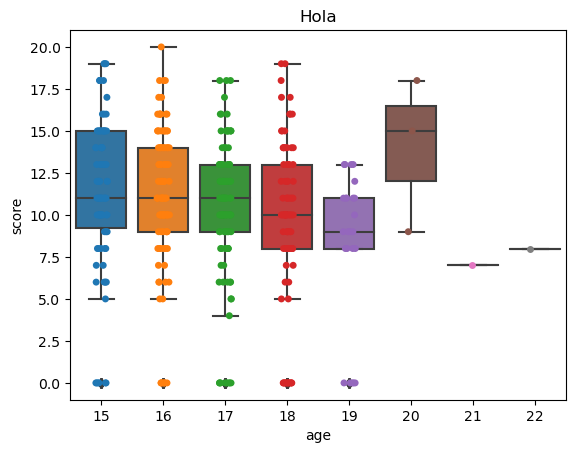

In [24]:
ax = sns.boxplot(x='age', y='score', data=df)
ax = sns.stripplot(x= 'age', y= 'score', data=df)


plt.title('Hola')

In [26]:
smdte = df.groupby('age')['score'].agg(['mean','std'])
smdte


,mean,std
age,,
15,11.256098,4.596861
16,11.028846,4.282402
17,10.275510,4.290437
18,9.548780,4.994200
19,8.208333,4.606037
20,14.000000,4.582576
21,7.000000,NaN
22,8.000000,NaN


Text(0.5, 1.0, 'HOLA')

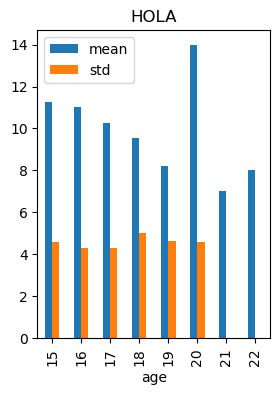

In [91]:
smdte.plot(kind = 'bar', figsize = (3,4),)
plt.title('HOLA')


# HORAS DE ESTUDIO SEPARADAS POR GENERO

In [86]:
hesg = df.pivot_table(values="score", index="studytime", columns="sex", aggfunc= 'count')
hesg

sex,F,M
studytime,,
1. <2 hours,27,78
2. 2 - 5 hours,113,85
3. 5 - 10 hours,51,14
4. >10 hours,17,10


Text(0, 0.5, 'Students')

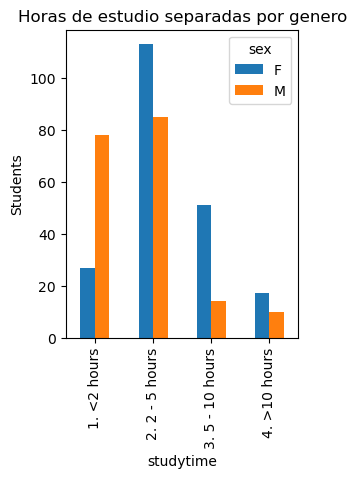

In [89]:
hesg.plot(kind = 'bar', figsize = (3,4),)
plt.title('Horas de estudio separadas por genero')
plt.ylabel('Students')

# MUJERES QUE ESTUDIARON CUANTAS HORAS CUANTOS SI PASARON

In [29]:
mstf = df[(df.sex == 'F') & (df.score > 10) & (df.studytime =='1. <2 hours')].count()[0]
mstf

14

In [30]:
mstf1 = df[(df.sex == 'F') & (df.score > 10) & (df.studytime =='2. 2 - 5 hours')].count()[0]
mstf1

49

In [31]:
mstf2 = df[(df.sex == 'F') & (df.score > 10) & (df.studytime =='3. 5 - 10 hours')].count()[0]
mstf2

29

In [32]:
mstf3 = df[(df.sex == 'F') & (df.score > 10) & (df.studytime =='4. >10 hours')].count()[0]
mstf3

11

In [ ]:
datos = ('<2 hours',' 2 - 5 hours','5 - 10 hours','>10 hours')
datos1 = ('14','49','29','11')


# HOMBRES QUE ESTUDIARON CUANTAS HORAS CUANTOS SI PASARON

In [33]:
mstf = df[(df.sex == 'M') & (df.score > 10) & (df.studytime =='1. <2 hours')].count()[0]
mstf

37

In [34]:
mstf1 = df[(df.sex == 'M') & (df.score > 10) & (df.studytime =='2. 2 - 5 hours')].count()[0]
mstf1

51

In [35]:
mstf2 = df[(df.sex == 'M') & (df.score > 10) & (df.studytime =='3. 5 - 10 hours')].count()[0]
mstf2

12

In [36]:
mstf3 = df[(df.sex == 'M') & (df.score > 10) & (df.studytime =='4. >10 hours')].count()[0]
mstf3

6

# MEDIANA Y DESVIASION TIPICA CON STUDYTIME EDAD Y SEXO

In [37]:
df.pivot_table(
    values="score", index=(["studytime","age"]), columns="sex", aggfunc= (['mean','std'])
    )


mean                  std          
sex                          F          M         F         M
studytime       age                                          
1. <2 hours     15   10.857143  13.357143  6.039552  2.898465
                16   10.333333  10.400000  4.330127  5.515131
                17    8.875000   9.882353  5.436320  4.768154
                18    8.666667   8.285714  2.309401  4.427685
                19         NaN   5.000000       NaN  4.582576
                20         NaN  18.000000       NaN       NaN
                21         NaN   7.000000       NaN       NaN
                22         NaN   8.000000       NaN       NaN
2. 2 - 5 hours  15    8.944444  12.700000  3.701704  4.612340
                16   10.542857  11.736842  3.950747  2.959769
                17   10.037037  10.043478  4.318845  2.976854
                18    8.440000   9.941176  4.975607  4.892221
                19    7.625000  11.000000  4.897157  1.870829
                20         NaN   9.000000       NaN       NaN
3. 5 - 10 hours 15    9.000000  15.000000  5.500000  3.605551
                16   11.285714  15.000000  3.302236  3.559026
                17   11.421053        NaN  3.775885       NaN
                18   10.700000  12.714286  6.750309  2.288689
                19    9.600000        NaN  5.458938       NaN
                20   15.000000        NaN       NaN       NaN
4. >10 hours    15   11.250000  10.571429  3.403430  5.028490
                16    9.333333  17.500000  2.886751  3.535534
                17   12.250000        NaN  8.500000       NaN
                18   11.400000   8.000000  6.618157       NaN
                19    8.000000        NaN       NaN       NaN

# CUANTOS HOMBRES REPROBARON Y APROBARON

In [38]:
mr = df[(df.sex == 'M') & (df.score > 10)].count()[0]
mr

106

In [39]:
ma = df[(df.sex == 'M') & (df.score <= 10)].count()[0]
ma

81

# CUANTAS MUJERES REPROBARON Y APROBARON

In [40]:
mf = df[(df.sex == 'F') & (df.score > 10)].count()[0]
mf

103

In [41]:
mf1 = df[(df.sex == 'F') & (df.score <= 10)].count()[0]
mf1

105

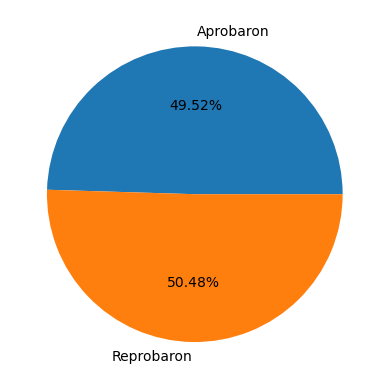

In [75]:
ldhi = lables = ['Aprobaron','Reprobaron']
plt.pie([mf,mf1],labels = ldhi, autopct = '%.2f%%')
plt.show()

# TIENEN O NO INTERNET

In [42]:
inter_n = df.loc[df['internet'] == 'no'].count()[0]
inter_n

print('The next result represents the amount of the students that do not have internet:',inter_n)

The next result represents the amount of the students that do not have internet: 66


In [43]:
inter_y = df.loc[df['internet'] == 'yes'].count()[0]
inter_y

print('The next result represents the amount of the students that have internet:',inter_y)

The next result represents the amount of the students that have internet: 329


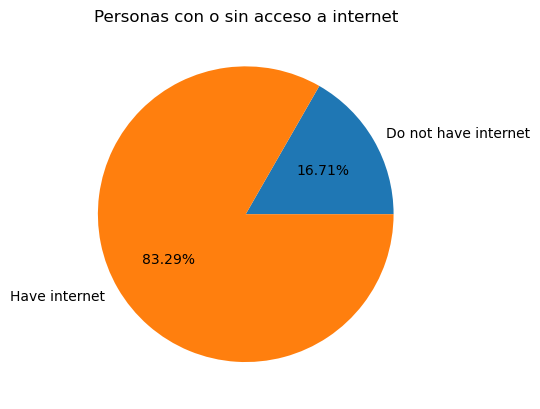

In [69]:
labels = ['Do not have internet', 'Have internet']

plt.pie([inter_n,inter_y],labels = labels, autopct = '%.2f%%')

plt.title('Personas con o sin acceso a internet')
plt.show()

# APROBAR O REPROBAR

In [45]:
ap_y = df[(df.score >10)].count()[0]
ap_y
print('The next result represents the amount of the students with a passing grade, which means that their score was higher than 10:',
      ap_y)

The next result represents the amount of the students with a passing grade, which means that their score was higher than 10: 209


In [46]:
ap_n = df.loc[df['score'] <= 10].count()[0]
ap_n

186

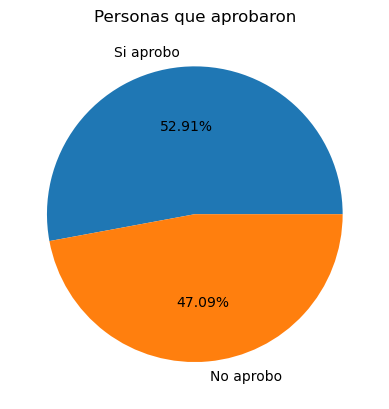

In [47]:
labels = ['Si aprobo', 'No aprobo']

plt.pie([ap_y,ap_n],labels = labels, autopct = '%.2f%%')

plt.title('Personas que aprobaron')
plt.show()

# EL INTERNET INFLUYE O NO PARA LA CALIFICACION

In [48]:
pg.anova(
    data = df,
    dv = 'score',
    between = ['internet'],
    detailed = True
).round(4)

,Source,SS,DF,MS,F,p-unc,np2
0,internet,80.2096,1,80.2096,3.849,0.0505,0.0097
1,Within,8189.6992,393,20.8389,NaN,NaN,NaN


In [49]:
df.groupby('internet')['score'].agg(['mean','std'])

,mean,std
internet,,
no,9.409091,4.485797
yes,10.617021,4.580494


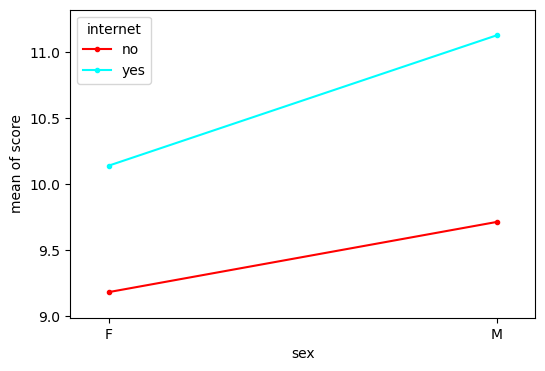

In [63]:
fig, ax = plt.subplots(figsize=(6, 4))
fig = interaction_plot(
    x        = df.sex,
    trace    = df.internet,
    response = df.score,
    ax       = ax,
)

# EL SEXO INFLUYE O NO PARA LA CALIFICACION

In [50]:
pg.anova(
    data = df,
    dv = 'score',
    between = ['sex'],
    detailed = True
).round(4)

,Source,SS,DF,MS,F,p-unc,np2
0,sex,88.5134,1,88.5134,4.2518,0.0399,0.0107
1,Within,8181.3954,393,20.8178,NaN,NaN,NaN


In [51]:
df.groupby('sex')['score'].agg(['mean','std'])

,mean,std
sex,,
F,9.966346,4.622338
M,10.914439,4.495297


# EL TIEMPO DE ESTUDIO INFLUYE O NO PARA LA CALIFICACION

In [52]:
pg.anova(
    data = df,
    dv = 'score',
    between = ['studytime'],
    detailed = True
).round(4)

,Source,SS,DF,MS,F,p-unc,np2
0,studytime,108.2002,3,36.0667,1.7278,0.1607,0.0131
1,Within,8161.7087,391,20.8739,NaN,NaN,NaN


In [53]:
df.groupby('studytime')['score'].agg(['mean','std'])

,mean,std
studytime,,
1. <2 hours,10.047619,4.956311
2. 2 - 5 hours,10.171717,4.217537
3. 5 - 10 hours,11.400000,4.639504
4. >10 hours,11.259259,5.281263


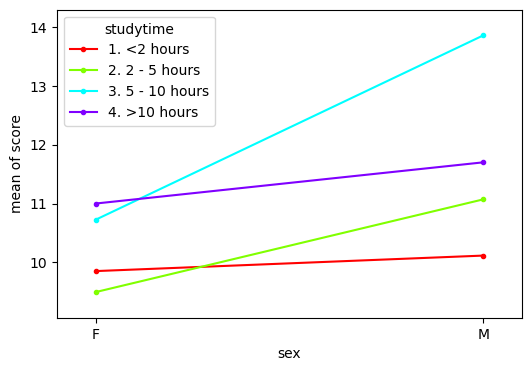

In [62]:
fig, ax = plt.subplots(figsize=(6, 4))
fig = interaction_plot(
    x        = df.sex,
    trace    = df.studytime,
    response = df.score,
    ax       = ax,
)

# EL TAMANO DE FAMILIA INFLUYE O NO PARA LA CALIFICACION

In [54]:
pg.anova(
    data = df,
    dv = 'score',
    between = ['familysize'],
    detailed = True
).round(4)

,Source,SS,DF,MS,F,p-unc,np2
0,familysize,54.8057,1,54.8057,2.6218,0.1062,0.0066
1,Within,8215.1032,393,20.9036,NaN,NaN,NaN


In [55]:
df.groupby('familysize')['score'].agg(['mean','std'])

,mean,std
familysize,,
<=3,11.000000,4.225921
>3,10.177936,4.704520


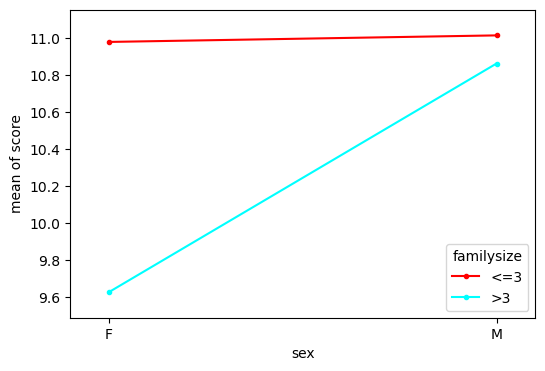

In [64]:
fig, ax = plt.subplots(figsize=(6, 4))
fig = interaction_plot(
    x        = df.sex,
    trace    = df.familysize,
    response = df.score,
    ax       = ax,
)

# LA EDAD INFLUYE O NO PARA LA CALIFICACION

In [56]:
pg.anova(
    data = df,
    dv = 'score',
    between = ['age'],
    detailed = True
).round(4)

,Source,SS,DF,MS,F,p-unc,np2
0,age,333.5490,7,47.6499,2.3235,0.0248,0.0403
1,Within,7936.3598,387,20.5074,NaN,NaN,NaN


In [57]:
print('score medio y desviacion tipica por edad')
df.groupby('age')['score'].agg(['mean','std'])

score medio y desviacion tipica por edad


,mean,std
age,,
15,11.256098,4.596861
16,11.028846,4.282402
17,10.275510,4.290437
18,9.548780,4.994200
19,8.208333,4.606037
20,14.000000,4.582576
21,7.000000,NaN
22,8.000000,NaN


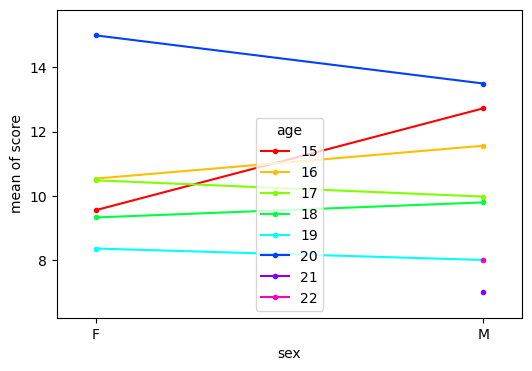

In [58]:
fig, ax = plt.subplots(figsize=(6, 4))
fig = interaction_plot(
    x        = df.sex,
    trace    = df.age,
    response = df.score,
    ax       = ax,
)